In [5]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

def plot_lightcurves(fits_file):
    # Initialize arrays for time, rates, and errors
    time_combined = np.array([])
    rate1_combined = np.array([])
    error_combined = np.array([])
    
    # Open the FITS file and loop over each HDU
    with fits.open(fits_file) as hdul:
        for hdu in hdul[1:]:  # Skip the primary HDU
            data = hdu.data
            
            # Extract TIME, RATE, and ERROR from the data
            time = data['TIME']
            rate1 = data['RATE']
            error = data['ERROR']  # Assuming the error column is named 'ERROR'
            
            # Combine the data across HDUs
            time_combined = np.concatenate([time_combined, time])
            rate1_combined = np.concatenate([rate1_combined, rate1])
            error_combined = np.concatenate([error_combined, error])
    
    # Plot the light curve with error bars
    plt.figure(figsize=(10, 6))
    plt.errorbar(time_combined, rate1_combined, yerr=error_combined, fmt='o', ecolor='r', capsize=3, markersize=3,markeredgewidth=1)
    plt.xlabel('Time')
    plt.ylabel('Rate')
    plt.title('Light Curve')
    plt.grid(True)



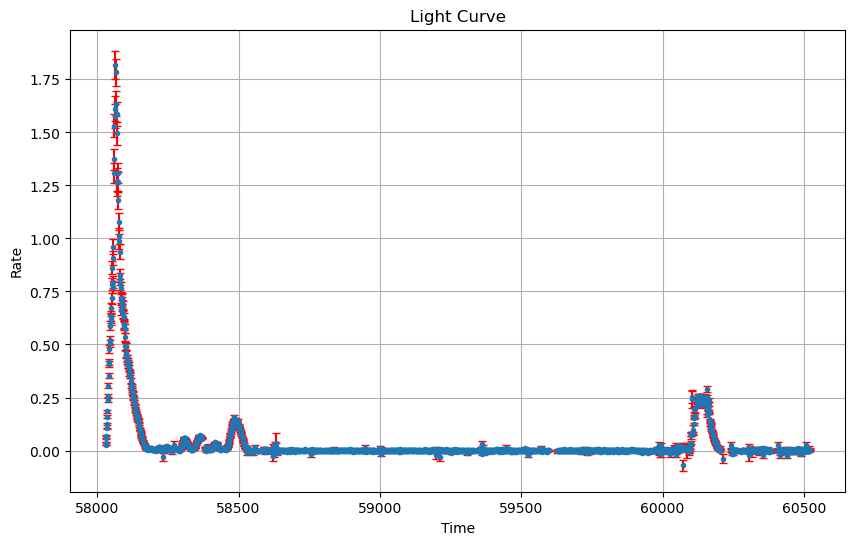

In [6]:
# Plotting Rate1 vs MJD Time
plot_lightcurves('swbj0243_7p6126_d2407.lc.gz')
#plt.xlim(59988,60268)
# #plt.ylim(0,80)

In [29]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import mplcursors
from astropy.time import Time

# Enable interactive mode in Jupyter Notebook
%matplotlib notebook

def plot_lightcurves(fits_file):
    # Initialize arrays for time, rates, and errors
    time_combined = np.array([])
    rate1_combined = np.array([])
    error_combined = np.array([])
    flag_combined= np.array([])
    with fits.open(fits_file) as hdul:
        for hdu in hdul[1:]:  # Skip the primary HDU
            data = hdu.data

            # Extract TIME, RATE, and ERROR from the data
            time = data['TIME']
            rate1 = data['RATE']
            error = data['ERROR']  # Assuming the error column is named 'ERROR'
            flag= data['DATA_FLAG']

            # Combine the data across HDUs
            time_combined = np.concatenate([time_combined, time])
            rate1_combined = np.concatenate([rate1_combined, rate1])
            error_combined = np.concatenate([error_combined, error])
            flag_combined= np.concatenate([flag_combined, flag])

            time_combined = time_combined[flag_combined<4]
            rate1_combined = rate1_combined[flag_combined<4]
            error_combined = error_combined[flag_combined<4]
    
        # Convert UTC start times to MJD
        utc_start_times = [
            "2023-04-10T15:03:28",
            "2023-04-13T00:28:20", 
            "2023-04-25T11:11:59", 
            "2023-06-17T10:28:32", 
            "2023-07-05T05:41:40", 
            "2023-08-18T01:42:52", 
            "2023-09-16T06:00:40"
        ]

        # Convert UTC strings to MJD
        utc_start_times = Time(utc_start_times, format='isot')
        mjd_start_times = utc_start_times.mjd

        # Plot the light curve with error bars
        plt.figure(figsize=(10, 4))
        plt.errorbar(time_combined, rate1_combined, yerr=error_combined, fmt='o', ecolor='r', capsize=3, 
                     label='Rate with Error', markersize=4, markeredgewidth=0.5)

    #    Plot vertical lines for exposure starts
        for mjd_start in mjd_start_times:
            plt.axvline(x=mjd_start, color='r', linestyle='--', label=f'Start: {Time(mjd_start, format="mjd").iso[:10]}')

        plt.xlabel('Time (MJD)')
        plt.ylabel('Rate')
        plt.title('Light Curve')
        plt.legend()
        plt.grid(True)

        # Enable interactive cursor
        #mplcursors.cursor(hover=True)
        plt.xlim(60000,60300)
        plt.ylim(-0.01,0.35)
        plt.show()


<IPython.core.display.Javascript object>


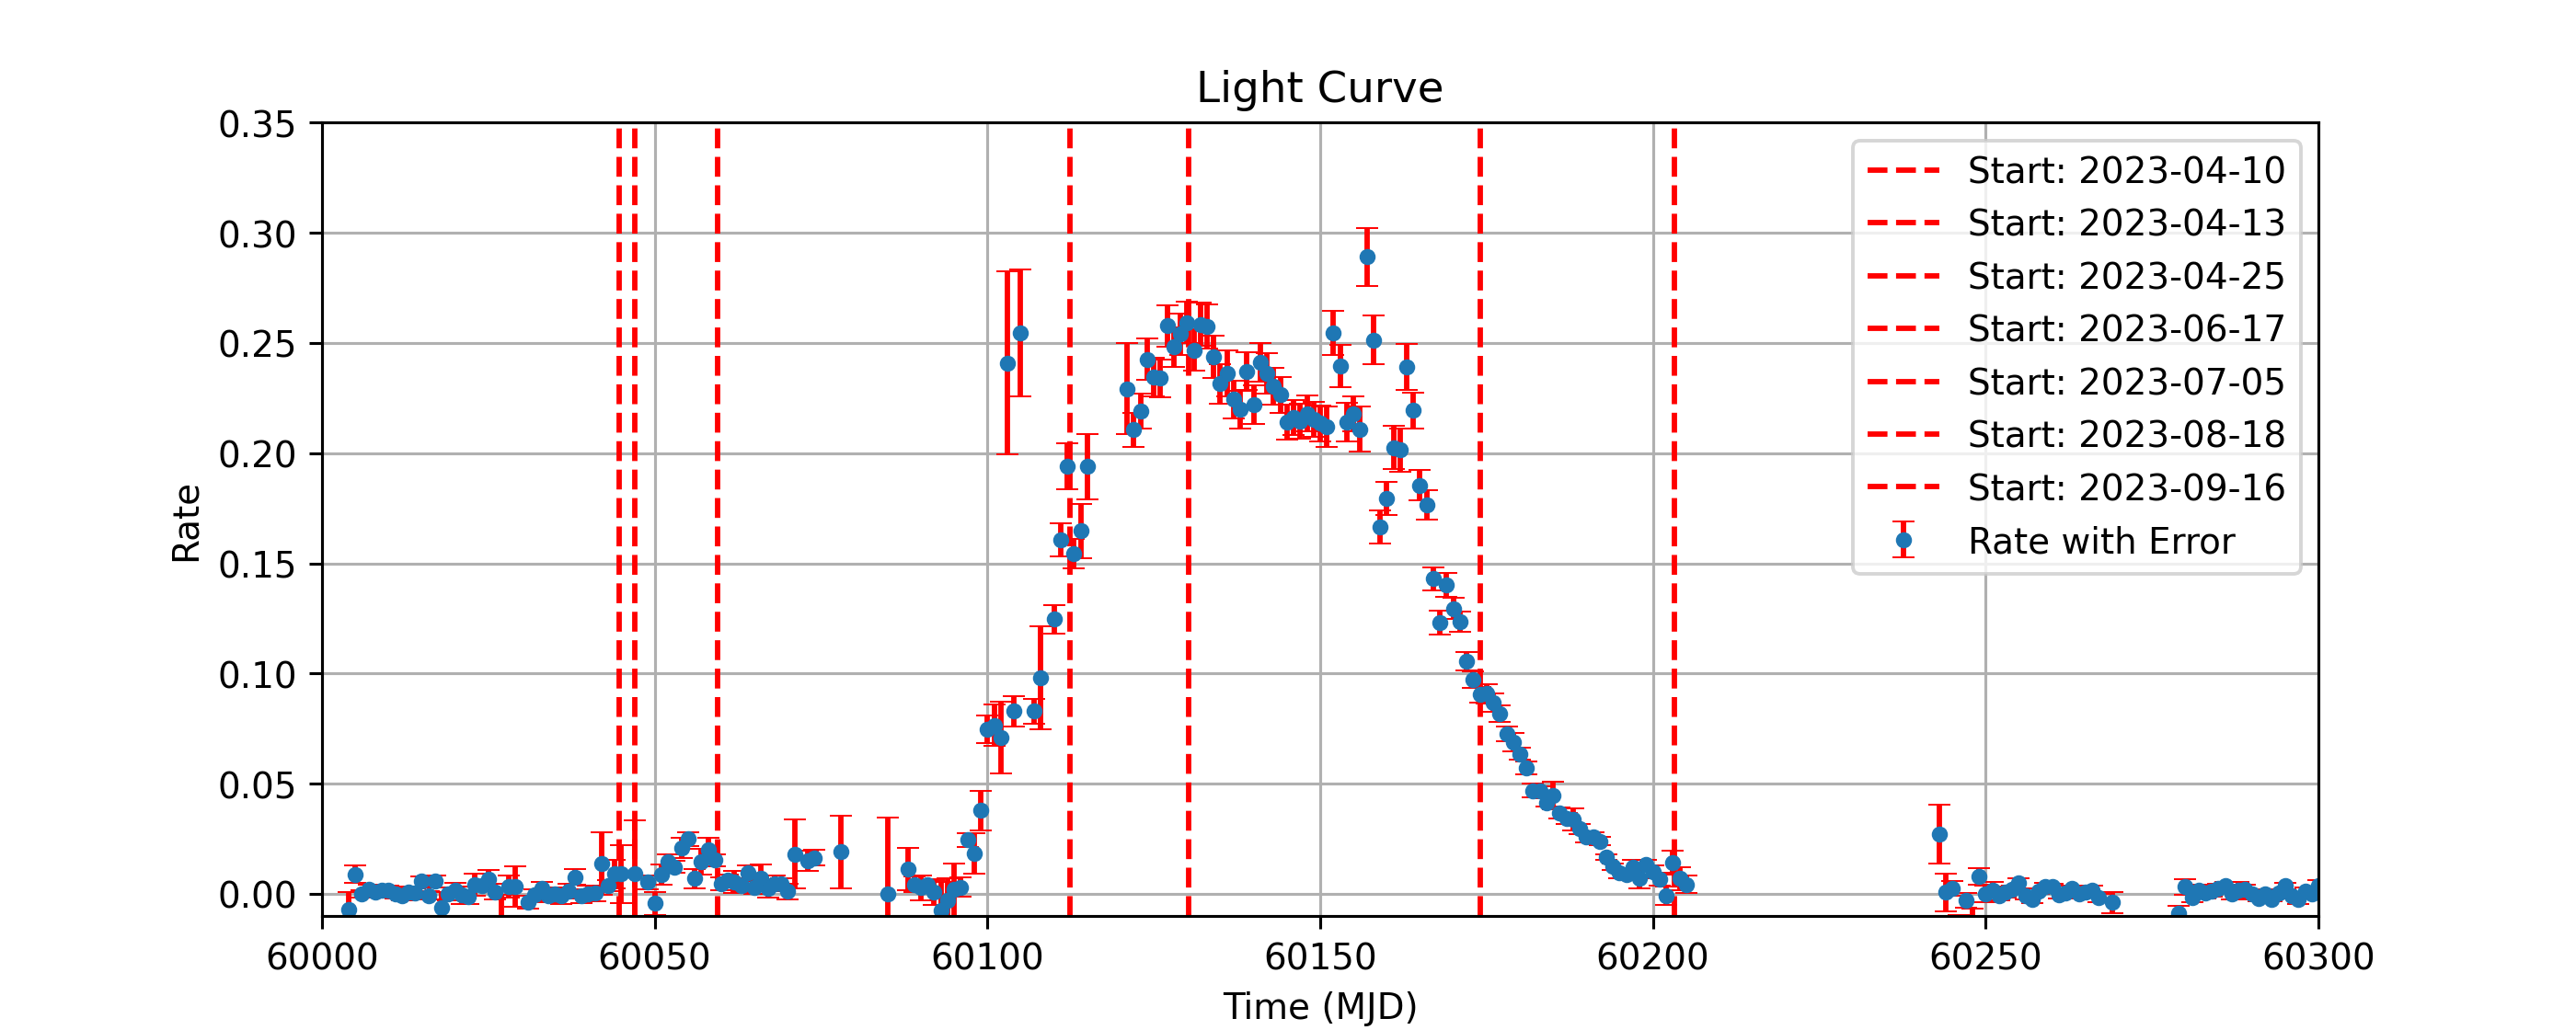

In [31]:
# Plotting Rate1 vs MJD Time
plot_lightcurves('swbj0243_7p6126_d2407.lc.gz')


In [36]:
with fits.open('swbj0243_7p6126_d2407.lc.gz') as hdul:
        # Initialize arrays for time, rates, and errors
        time_combined = np.array([])
        rate1_combined = np.array([])
        error_combined = np.array([])
        flag_combined= np.array([])
        for hdu in hdul[1:]:  # Skip the primary HDU
            data = hdu.data
            
            # Extract TIME, RATE, and ERROR from the data
            time = data['TIME']
            rate1 = data['RATE']
            error = data['ERROR']  # Assuming the error column is named 'ERROR'
            flag= data['DATA_FLAG']
            
            # Combine the data across HDUs
            time_combined = np.concatenate([time_combined, time])
            rate1_combined = np.concatenate([rate1_combined, rate1])
            error_combined = np.concatenate([error_combined, error])
            flag_combined= np.concatenate([flag_combined, flag])

In [37]:
np.unique(flag_combined)

array([0., 2., 3.])

In [44]:
print(rate1_combined[time_combined==60044],rate1_combined[time_combined==60047],
rate1_combined[time_combined==60112],
rate1_combined[time_combined==60130],
rate1_combined[time_combined==60174],
rate1_combined[time_combined==60203])

[0.0089357] [0.00922004] [0.19404365] [0.2593448] [0.09031704] [0.01413414]
